Project code

In [2]:
!pip install astral
!pip install skyfield

In [3]:
from astral import LocationInfo
from astral.moon import phase as moon_phase
from datetime import datetime
import numpy as np
from skyfield.api import load, Topos
import matplotlib.pyplot as plt

In [4]:
# Function to estimate moon illumination based on its phase
def get_moon_illumination(phase):
    """Returns approximate lux intensity based on moon phase."""
    # Lux values based on different moon phases (approximate)
    lux_values = {0: 0.3,  # New Moon
                  1: 0.2,  # Waxing Crescent
                  7: 0.03, # First Quarter
                  14: 0.25, # Full Moon
                  21: 0.03, # Last Quarter
                  28: 0.2}  # Waning Crescent
    return lux_values.get(phase, 0.1)  # Default for intermediate phases

In [5]:
# Define observer location in the North Atlantic
# Example coordinates: 50N, 30W
location = LocationInfo("North Atlantic", "", "UTC", 50.0, -30.0)

In [6]:
# Load astronomical data
eph = load('de421.bsp')  # Ephemeris data
observer = Topos(latitude_degrees=50.0, longitude_degrees=-30.0)
ts = load.timescale()
date = datetime.utcnow()
t = ts.utc(date.year, date.month, date.day, date.hour, date.minute, date.second)

[#################################] 100% de421.bsp
/tmp/ipykernel_9561/1794587056.py:5: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  date = datetime.utcnow()


In [7]:
# Compute moon position
moon = eph['moon']
astro_position = eph['earth'] + observer
moon_alt, _, _ = astro_position.at(t).observe(moon).apparent().altaz()

In [8]:
# Compute the moon phase and illumination
phase = moon_phase(date)
lux_intensity = get_moon_illumination(phase)

In [9]:
# Simulate optical observation - Basic Target Visibility
# Assuming a 15m long target with reflectivity of 0.7 (low reflectance on dark water)
target_size = 15  # meters
reflectivity = 0.7  # Fraction of light reflected

In [10]:
# Compute basic visibility metric (lux * reflectivity * target size)
visibility_score = lux_intensity * reflectivity * target_size

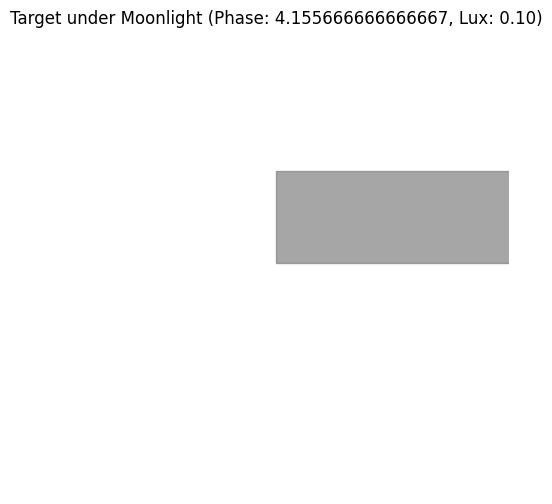

In [11]:
# Render simple scene
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_facecolor("black")  # Dark background
ax.add_patch(plt.Rectangle((0, 0), 15, 2, color='gray', alpha=reflectivity))  # Target
plt.xlim(-10, 10)
plt.ylim(-5, 5)
plt.title(f"Target under Moonlight (Phase: {phase}, Lux: {lux_intensity:.2f})")
plt.axis("off")
plt.show()

In [12]:
# Print results
print(f"Date: {date}")
print(f"Moon Phase: {phase} (0=New, 14=Full)")
print(f"Lux Intensity: {lux_intensity} lux")
print(f"Moon Altitude: {moon_alt.degrees:.2f} degrees")
print(f"Target Visibility Score: {visibility_score:.2f}")

Date: 2025-04-01 20:29:58.465937
Moon Phase: 4.155666666666667 (0=New, 14=Full)
Lux Intensity: 0.1 lux
Moon Altitude: 42.63 degrees
Target Visibility Score: 1.05
